# Problem Statement

We need to predict the chance of admission based on the various student scores.

--> __Variables

* Serial No.
* GRE Score
* TOEFL Score
* University Rating
* SOP
* LOR
* CGPA
* Research

-->__Label/Target

* Chance of Admission

Chance of Admission
Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [179]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing Dataset

data = pd.read_csv('Admission_Prediction.csv')

In [9]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [10]:
data.shape

(500, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [13]:
# lets start Pre - Processing

In [14]:
# As we clearly see above that Null values are present in the dataset so we will fill that null 
# values rather than dropping them because our dataset is small.

In [15]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [21]:
# Now lets drop the Column ("Serial No.") because we don't need.

In [18]:
data.drop(columns='Serial No.',inplace = True)

In [44]:
# Now checking for Null values

In [45]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
# Lets visualize the data and analyze the relationship between independent and dependent variables.
# Continuoues Data always form a normal distribution.

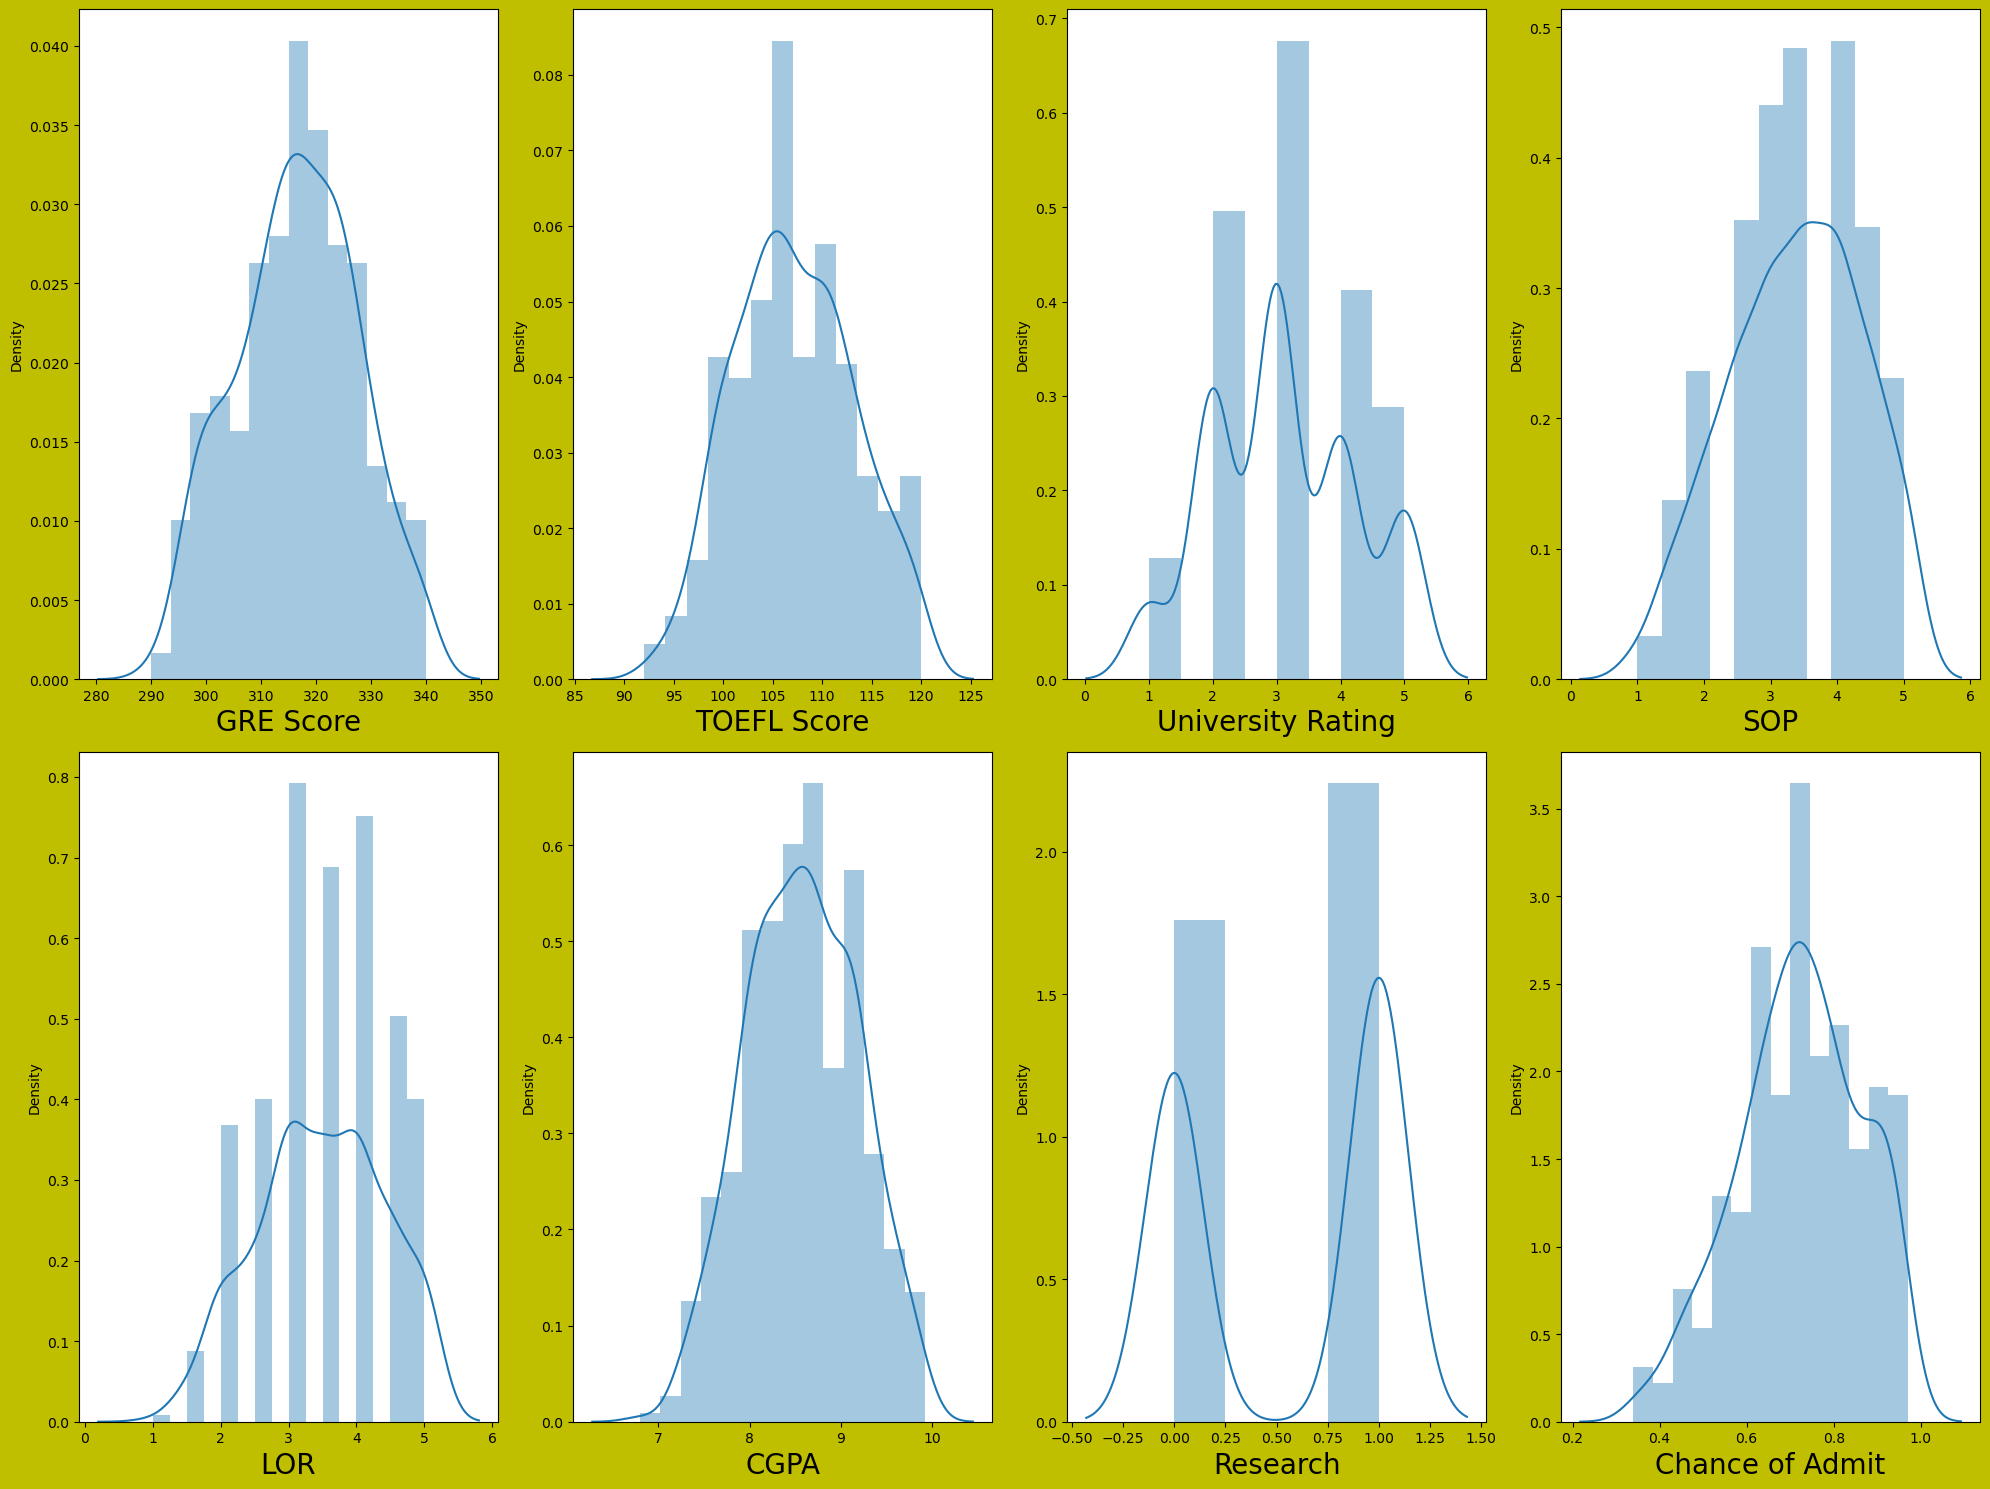

In [29]:
plt.figure(figsize=(20,15),facecolor='y')
plotnumber=1
for i in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.tight_layout()

In [ ]:
# The data distribution looks decent enough and there is no skeweness present.

# Lets observe the relationship between indipendent and dependent variables.

In [92]:
#Divide dataset into Features and label variables.

X = data.drop(columns=['Chance of Admit'])
y = data[['Chance of Admit']]

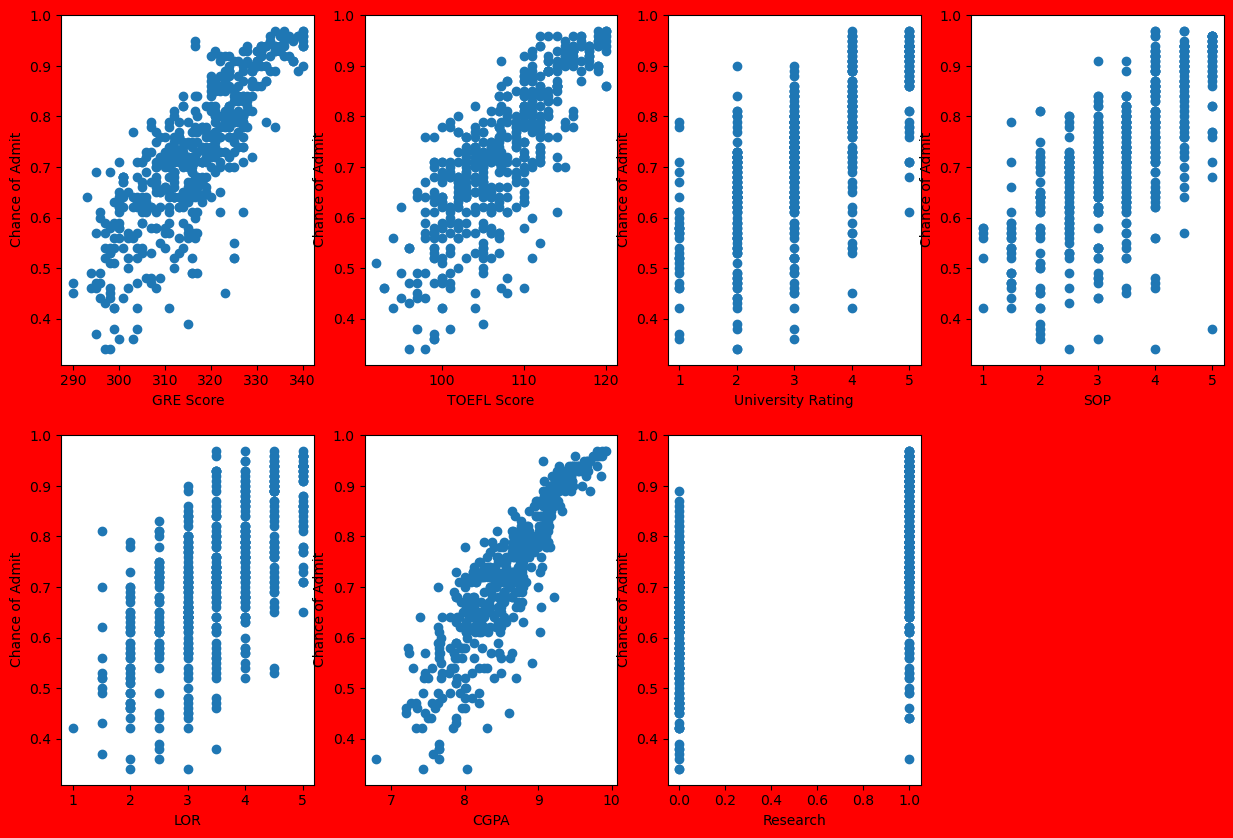

In [41]:
plt.figure(figsize=(15,10),facecolor='r')
plotnumber=1
for i in X:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[i],y)
        plt.xlabel(i , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

In [46]:
# Lets find out Co-relation among feature and target variables using Heatmap.

In [84]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819663,0.623394,0.608372,0.527623,0.818347,0.544993,0.802304
TOEFL Score,0.819663,1.000000,0.644296,0.643155,0.535785,0.805557,0.464913,0.786675
University Rating,0.623394,0.644296,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608372,0.643155,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.527623,0.535785,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818347,0.805557,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544993,0.464913,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802304,0.786675,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

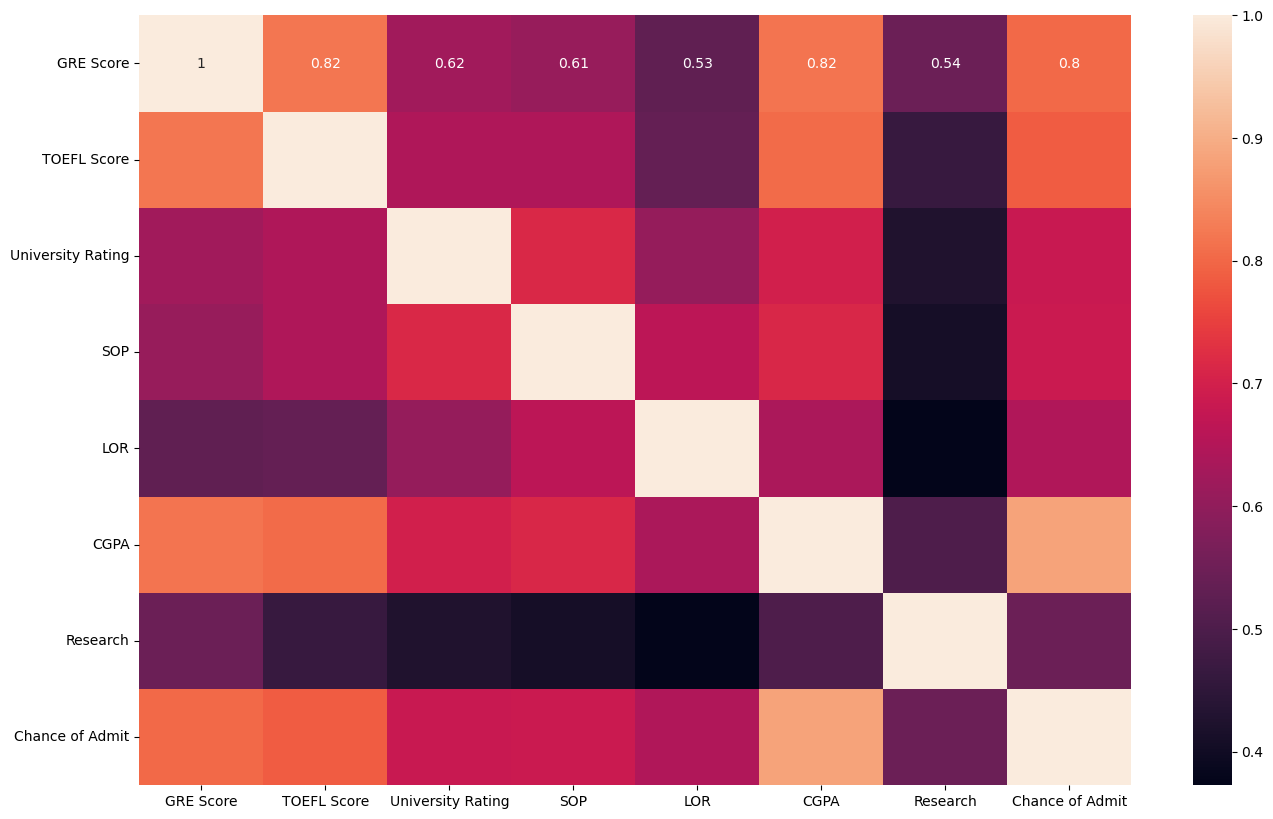

In [91]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot = True)

In [97]:
# Now Train and Test our Dataset.

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=160)

In [ ]:
# Now Normalize the data through Standard Scaler

In [99]:
scaler = StandardScaler()
scaler

StandardScaler()

In [100]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [101]:
# Creating Model Object:

In [102]:
lr = LinearRegression()
lr

LinearRegression()

In [103]:
# Apply Multiple Linear Regression and fit our training data

In [105]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Now the co-efficient or slope and the intercept is:

In [126]:
print('Co-efficient =',lr.coef_)
print('Intercept = ',lr.intercept_)

Co-efficient = [[0.02105604 0.01251062 0.00954996 0.00060783 0.01471629 0.07580494
  0.00926096]]
Intercept =  [0.72141333]


In [ ]:
# Now predict the Test data and plot the best fit line for it.

In [127]:
y_pred = lr.predict(X_test)

In [133]:
# Applying Performance Metrices for checking Error present in the model (Model Evaluation):

In [134]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse =",np.sqrt(mse))

mae =  0.043911616604033976
mse =  0.0038618498887540687
rmse = 0.062143783991273564


In [136]:
# Now checking Model Confidence: [basically if score near to 0 i.e, bad model but if score near to 1
# i.e, good model]

In [135]:
print("R2_score = ",r2_score(y_test,y_pred))

R2_score =  0.8156582243974898


In [ ]:
# Now predict for any random value:

In [165]:
lr.predict(scaler.transform([[299.0,101.0,4.0,4.5,4.5,9.04,0]]))

array([[0.74884559]])

In [ ]:
# Lets plot and visualize how good is our Model
# Whatever the result I am going to get its my model Confidence / How well my model will perform.

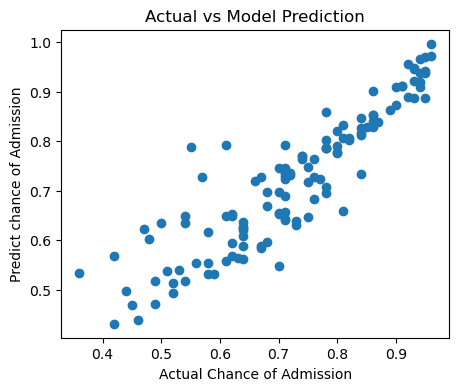

In [178]:
plt.figure(figsize=(5,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

#  Now lets check if our Model is overfitted or not by 
# using regularization

* by using Lasso and LassoCV
* by using Ridge and RidgeCV

##### We are going to find learning rate through LassoCV and Ridge CV
We can call learning rate as λ or alpha rate

In [180]:
LCV = LassoCV(alphas = None , max_iter =100)
LCV.fit(X_train,y_train)

LassoCV(max_iter=100)

In [181]:
#best alpha paremetere
alpha = LCV.alpha_
alpha

0.0009353355191140483

In [182]:
# Now, we have best parameter, Lets use Lasso regression and see how well our data has 
# fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0009353355191140483)

In [183]:
lasso_reg.score(X_test,y_test)

0.8157781353885613

* So, what it is indicating now, why we are trying Lasso regression beacuse we thought that linear regression is overfitted, here also getting the same result which means that we either use a linear regression or lasso both are giving same.So, our model is not over-fitted.

In [185]:
# Ridge will return best alpha and coefficients after performing 10 CV(Cross validation)

RCV = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
RCV.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

* We will going to give a small range of array here.Do not try all the possibilitis, don't start first from end.In this range only, we should learn what error are the best out of this.

In [186]:
RCV.alpha_

0.09099999999999998

In [187]:
ridge_reg = Ridge(alpha = RCV.alpha_)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [188]:
ridge_reg.score(X_test,y_test)

0.8156842191963944

* We got around same R2 score using Ridge regression as well.So, its safe to say that there is no Overfitting.

# Thank You